In [1]:
!pip install keras

In [2]:
from keras.datasets import mnist


Using TensorFlow backend.


In [3]:
!pip install matplotlib


In [0]:
import matplotlib.pyplot as plt


11493376/11490434 [==============================] - 1s 0us/step


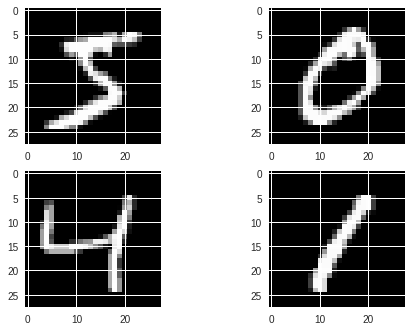

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

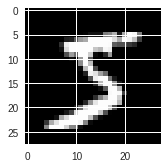

In [6]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

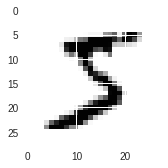

In [7]:
plt.subplot(221)
plt.imshow(X_train[0])

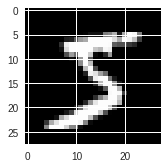

In [8]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [12]:
print(X_train.shape)

(60000, 28, 28)


In [0]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [17]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.2810 - acc: 0.9207 - val_loss: 0.1413 - val_acc: 0.9573
Epoch 2/10
 - 2s - loss: 0.1115 - acc: 0.9678 - val_loss: 0.0913 - val_acc: 0.9712
Epoch 3/10
 - 2s - loss: 0.0713 - acc: 0.9799 - val_loss: 0.0787 - val_acc: 0.9770
Epoch 4/10
 - 2s - loss: 0.0501 - acc: 0.9860 - val_loss: 0.0747 - val_acc: 0.9768
Epoch 5/10
 - 2s - loss: 0.0372 - acc: 0.9891 - val_loss: 0.0668 - val_acc: 0.9792
Epoch 6/10
 - 2s - loss: 0.0266 - acc: 0.9929 - val_loss: 0.0617 - val_acc: 0.9809
Epoch 7/10
 - 2s - loss: 0.0207 - acc: 0.9947 - val_loss: 0.0620 - val_acc: 0.9808
Epoch 8/10
 - 2s - loss: 0.0140 - acc: 0.9971 - val_loss: 0.0609 - val_acc: 0.9818
Epoch 9/10
 - 2s - loss: 0.0107 - acc: 0.9978 - val_loss: 0.0571 - val_acc: 0.9823
Epoch 10/10
 - 2s - loss: 0.0080 - acc: 0.9985 - val_loss: 0.0600 - val_acc: 0.9811
Baseline Error: 1.89%
